# Project Objective:
## The primary aim of this project was to analyze and compare the healthcare systems of the United States and Sweden. The comparison focused on several key metrics spanning the years 2000-2017:
* Cancer Mortality Rates: Data was examined on cancer death rates per 100,000 individuals, segregated by gender (male and female).
* Healthcare Expenditures: Annual expenditures on healthcare were studied to understand the financial commitments towards health services in both countries.
* Healthcare Quality - "Years of Life Lost": This metric quantifies the years lost due to premature deaths in the population. It is calculated by aggregating the years lost by individuals who passed 
away before reaching the expected life expectancy (e.g., 70 years).

# Data Visualization:
## Based on the collected data, a series of visualizations were created to provide clear insights into the gathered metrics.

# ey Questions Addressed:

* Cancer Mortality Disparities: How do the cancer mortality rates per 100,000 individuals differ between the United States and European countries, with a specific focus on Sweden?
* Healthcare Cost-Quality Relationship: How does the higher healthcare expenditure in the United States correlate with its cancer mortality rates when compared to European nations, especially Sweden? Does the data support the hypothesis that a higher cost translates to superior healthcare quality?





In [14]:
# import matplotlib, cartopy, csv, pandas, random, and colorsys

# !apt-get install -qq libgdal-dev libproj-dev
# !pip install --no-binary shapely shapely --force
# !pip install cartopy
import matplotlib.pyplot as plt
import random, csv
import pandas as pd


In [15]:
from zmq import RATE
from os import read

#celean Sweden's cancer mortality and return a dataframe containing only Crude rate for both sex
def clean_SweCancerMort_f_m():

    SweCancerMort_ff = "/Users/luismonteiro/Desktop/Data_Engineering/CSC-234_DataStorage/dataset-mort-females-2000-2017-sweden.csv"
    SweCancerMort_mf = '/Users/luismonteiro/Desktop/Data_Engineering/CSC-234_DataStorage/dataset-mort-males-2000-2017-sweden.csv'

    clean_read_SweCancerMort_ff = pd.read_csv(SweCancerMort_ff )
    clean_read_SweCancerMort_mf = pd.read_csv(SweCancerMort_mf)

    clean_read_SweCancerMort_ff['Crude rate'] = clean_read_SweCancerMort_ff['Crude rate'].astype('int64')
    clean_read_SweCancerMort_mf['Crude rate'] = clean_read_SweCancerMort_mf['Crude rate'].astype('int64')

    clean_read_SweCancerMort_ff = clean_read_SweCancerMort_ff['Crude rate']
    clean_read_SweCancerMort_mf = clean_read_SweCancerMort_mf['Crude rate']

    return clean_read_SweCancerMort_ff, clean_read_SweCancerMort_mf

#celean U.S's cancer mortality and return a dataframe containing only Crude rate for both sex
def clean_USCancerMort_f_m():


    USCancerMort_ff = '/Users/luismonteiro/Desktop/Data_Engineering/CSC-234_DataStorage/mort-females-2000-2017-usa.csv'
    USCancerMort_mf = '/Users/luismonteiro/Desktop/Data_Engineering/CSC-234_DataStorage/mort-males-2000-2017-usa.csv'

    read_USCancerMort_ff = pd.read_csv(USCancerMort_ff)
    read_USCancerMort_mf = pd.read_csv(USCancerMort_mf)


    read_USCancerMort_ff['Crude rate'] = read_USCancerMort_ff['Crude rate'].astype('int64')
    read_USCancerMort_mf['Crude rate'] = read_USCancerMort_mf['Crude rate'].astype('int64')

    clean_USCancerMort_ff = read_USCancerMort_ff['Crude rate']
    clean_USCancerMort_mf = read_USCancerMort_mf['Crude rate']

    # print(clean_USCancerMort_mf)

# clean_USCancerMort_f_m()

    return clean_USCancerMort_ff, clean_USCancerMort_mf

#clean U.S and Sweden yearly (2000 to 2017) spending and return it as a percentage of their GDP
def clean_US_WS_Health_sp():

    USHealth_sp = '/Users/luismonteiro/Desktop/Data_Engineering/CSC-234_DataStorage/united-states-healthcare-spending - united-states-healthcare-spending.csv'
    SweHealth_sp = '/Users/luismonteiro/Desktop/Data_Engineering/CSC-234_DataStorage/sweden-healthcare-spending.csv'

    read_SweHealth_sp = pd.read_csv(SweHealth_sp)
    read_USHealth_sp = pd.read_csv(USHealth_sp)

    not_SweHealth_sp = read_SweHealth_sp.drop([18,19])
    not_SweHealth_sp['% of GDP'] = not_SweHealth_sp['% of GDP'].astype('int64')
    SweHealth_sp_list = not_SweHealth_sp['% of GDP'].to_list()

    not_USHealth_sp = read_USHealth_sp.drop([18,19])
    not_USHealth_sp['% of GDP'] = not_USHealth_sp['% of GDP'].astype('int64')
    USHealth_sp_list = not_USHealth_sp['% of GDP'].to_list()

    return SweHealth_sp_list, USHealth_sp_list

# create year dataframe from 2000 to 2017
def get_years():

  USCancerMort_ff = '/Users/luismonteiro/Desktop/Data_Engineering/CSC-234_DataStorage/mort-males-2000-2017-usa.csv'

  read_USCancerMort_ff = pd.read_csv(USCancerMort_ff)

  years_list = read_USCancerMort_ff['Year'].to_list()


  return years_list

get_years()


#clean quality health and only returns the quality health over time of U.S and Sweden,
#the frame are created according to the years
def clean_Qality_health():

    Qality_health = '/Users/luismonteiro/Desktop/Data_Engineering/CSC-234_DataStorage/data-0HDYS.csv'
    read_Qality_health = pd.read_csv(Qality_health)

    clean_quality_health = read_Qality_health.loc[(read_Qality_health['Row Labels'].between(2000, 2017, inclusive=True)),['Sweden', 'United States of America']]

    clean_quality_health['Sweden'] = clean_quality_health['Sweden'].astype('int64')
    clean_quality_health['United States of America'] = clean_quality_health['United States of America'].astype('int64')

    SweQualityHealth_list = clean_quality_health['Sweden'].to_list()
    USQualityHealth_list = clean_quality_health['United States of America'].to_list()

    return SweQualityHealth_list, USQualityHealth_list



/var/folders/lv/v8dd5z596_d_nsr45ppwbxqh0000gn/T/ipykernel_38515/1138787360.py:85: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  clean_quality_health = read_Qality_health.loc[(read_Qality_health['Row Labels'].between(2000, 2017, inclusive=True)),['Sweden', 'United States of America']]


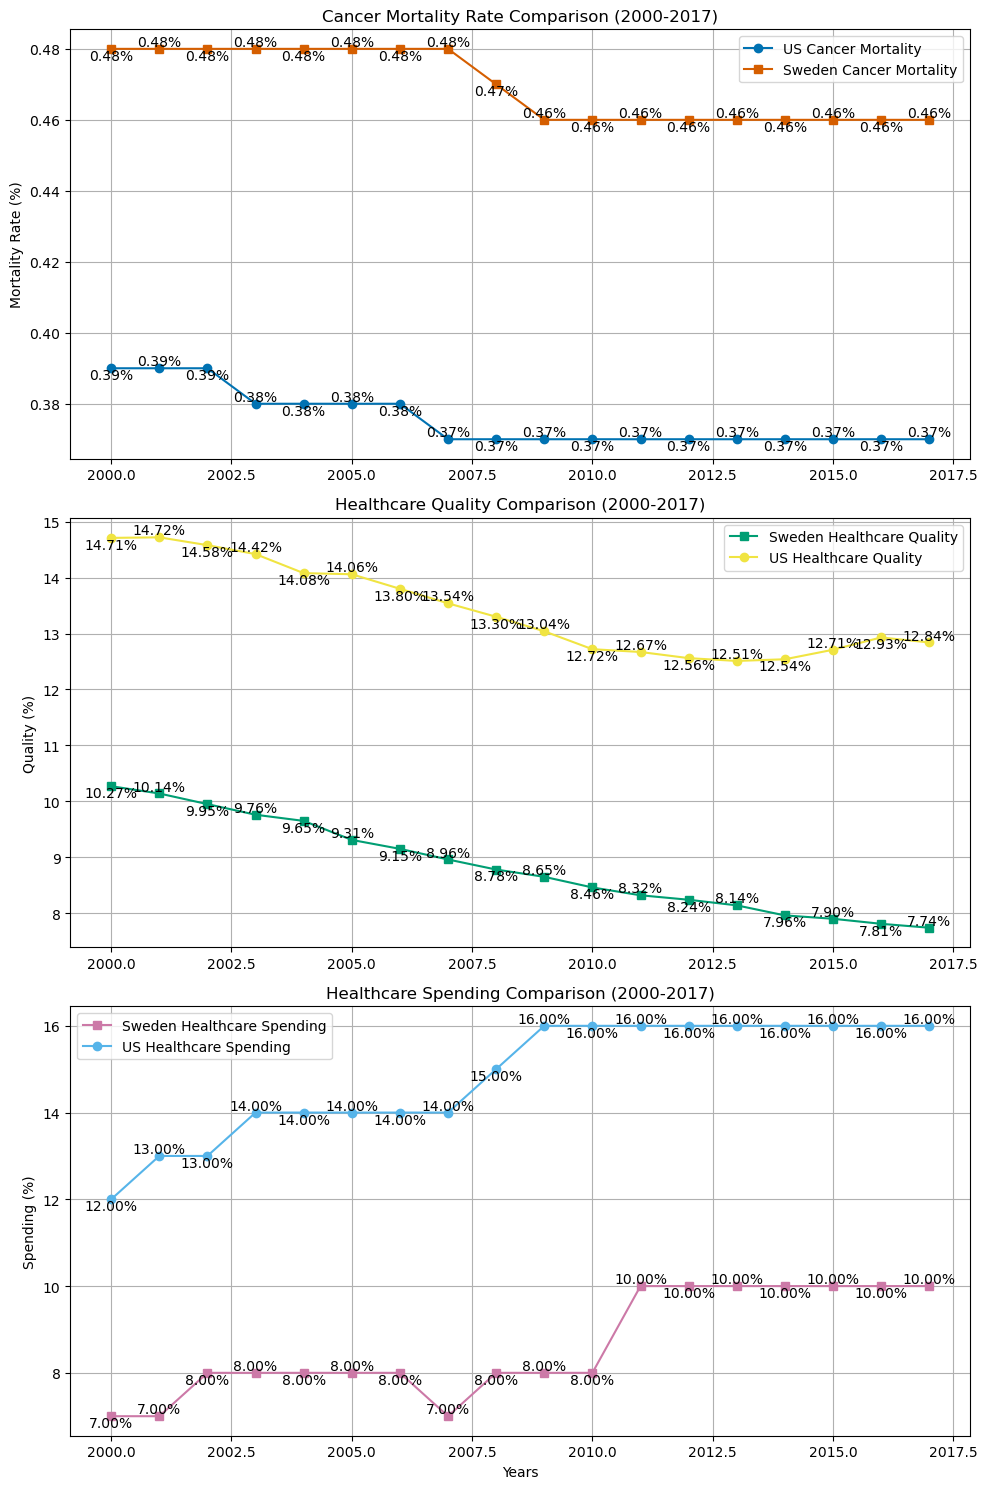

In [16]:
import matplotlib.pyplot as plt

import numpy as np

# Combine list of both sex for each country
def combine_FM_mort(female_l, male_l):

  combined_list = []
  for i in range(len(female_l)):
    combined_list.append(female_l[i] + male_l[i])
  return combined_list

#turn the numbers inside a list into percentages
def convertINPercentage(lst):
    return [round((i/100000) * 100, 2) for i in lst]



#return Sweden's combined list of both sex
def Swe_combined_FM_mort():

  clean_read_SweCancerMort_ff, clean_read_SweCancerMort_mf = clean_SweCancerMort_f_m()

  SweCancerMort_ff_list = clean_read_SweCancerMort_ff.to_list()
  SweCancerMort_mf_list = clean_read_SweCancerMort_mf.to_list()

  Swe_combined_FM_mort_list = combine_FM_mort(SweCancerMort_ff_list,SweCancerMort_mf_list )

  return Swe_combined_FM_mort_list

#return U.S combined list of both sex
def US_combined_FM_mort():

  clean_USCancerMort_ff, clean_USCancerMort_mf = clean_USCancerMort_f_m()

  USCancerMort_ff_list = clean_USCancerMort_ff.to_list()
  USCancerMort_mf_list = clean_USCancerMort_mf.tolist()

  US_combined_FM_mort_list = combine_FM_mort(USCancerMort_ff_list,USCancerMort_mf_list)

  return US_combined_FM_mort_list

# Add labels of percentages on each line using `annotate()
def labelNumEachLine(list,color,years_list,subplot):

  for i, (x, y) in enumerate(zip(years_list, list)):
      subplot.annotate("{:.2f}".format(y), xy=(x, y), xytext=(-10, 5), textcoords='offset points', color = color)


def annotate(ax, xs, ys, text_xs, text_ys):
    for i, (x, y) in enumerate(zip(xs, ys)):
        offset = 5
        if i % 2 == 0:  # alternate the y offset for clarity
            offset = -offset
        ax.annotate(f"{y:.2f}%", xy=(x, y), xytext=(0, offset), textcoords='offset points', fontsize=10, ha='center', va='center')



def create_improved_graph():
    US_combined_FM_mort_list = US_combined_FM_mort()
    Swe_combined_FM_mort_list = Swe_combined_FM_mort()

    USperc_comb_FM_mort_list = convertINPercentage(US_combined_FM_mort_list)
    Sweperc_comb_FM_mort_list = convertINPercentage(Swe_combined_FM_mort_list)

    SweQualityHealth_list, USQualityHealth_list = clean_Qality_health()
    SweQualHealthPerc_list = convertINPercentage(SweQualityHealth_list)
    USQualHealthPerc_list = convertINPercentage(USQualityHealth_list)

    years_list = get_years()

    SweHealth_sp_list, USHealth_sp_list = clean_US_WS_Health_sp()

    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    # Colorblind-friendly colors
    colors = ['#0072B2', '#D55E00', '#009E73', '#F0E442', '#CC79A7','#56B4E9']

    # Subplot 1: Cancer Mortality
    axs[0].plot(years_list, USperc_comb_FM_mort_list, 'o-', color=colors[0], label='US Cancer Mortality')
    axs[0].plot(years_list, Sweperc_comb_FM_mort_list, 's-', color=colors[1], label='Sweden Cancer Mortality')
    axs[0].set_title('Cancer Mortality Rate Comparison (2000-2017)')
    axs[0].set_ylabel('Mortality Rate (%)')
    axs[0].grid(True)
    axs[0].legend()

    annotate(axs[0], years_list, USperc_comb_FM_mort_list, [0, 0], [-15, 5])
    annotate(axs[0], years_list, Sweperc_comb_FM_mort_list, [0, 0], [5, -15])

    # Subplot 2: Healthcare Quality
    axs[1].plot(years_list, SweQualHealthPerc_list, 's-', color=colors[2], label='Sweden Healthcare Quality')
    axs[1].plot(years_list, USQualHealthPerc_list, 'o-', color=colors[3], label='US Healthcare Quality')
    axs[1].set_title('Healthcare Quality Comparison (2000-2017)')
    axs[1].set_ylabel('Quality (%)')
    axs[1].grid(True)
    axs[1].legend()

    annotate(axs[1], years_list, USQualHealthPerc_list, [0, 0], [5, -15])
    annotate(axs[1], years_list, SweQualHealthPerc_list, [0, 0], [5, -15])


    # Subplot 3: Healthcare Spending
    axs[2].plot(years_list, SweHealth_sp_list, 's-', color=colors[4], label='Sweden Healthcare Spending')
    axs[2].plot(years_list, USHealth_sp_list, 'o-', color=colors[5], label='US Healthcare Spending')
    axs[2].set_title('Healthcare Spending Comparison (2000-2017)')
    axs[2].set_xlabel('Years')
    axs[2].set_ylabel('Spending (%)')
    axs[2].grid(True)
    axs[2].legend()

    annotate(axs[2], years_list,USHealth_sp_list , [0, 0], [-15, 5])
    annotate(axs[2], years_list, SweHealth_sp_list, [0, 0], [-15, 5])


    plt.tight_layout()
    plt.show()



# Execute the new function to create the improved graph
create_improved_graph()